### Çoklu Regresyon Analizi

> Bu veri seti, reklam harcamaları ve satışlar arasındaki ilişkiyi incelemek için kullanılan bir pazarlama veri setidir.

> Çoklu doğrusal regresyon analizi yaparak , reklam harcamaları ve satışlar arasındaki ilişkiyi modellemek ve reklam harcamalarının satışları nasıl etkilediğini belirlemek için yapılmıştır.

> Bu veri setinde çoklu regresyon yaparak, reklam harcamalarının satışlar üzerindeki etkisini inceleyerek . Şirketin , reklam verilerinin temel özelliklerini anlayarak, şirketin reklam harcamalarını nasıl optimize edebileceğini belirleyebiliyoruz.

In [65]:
# Kütüphanelerimi ekliyoruz.

import numpy as np 
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

%matplotlib inline


In [66]:
# Veri setimiz
df = pd.read_csv('https://raw.githubusercontent.com/sumony2j/Prediction-Using-Multiple-Linear-Regression/main/Advertising.csv')


In [67]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


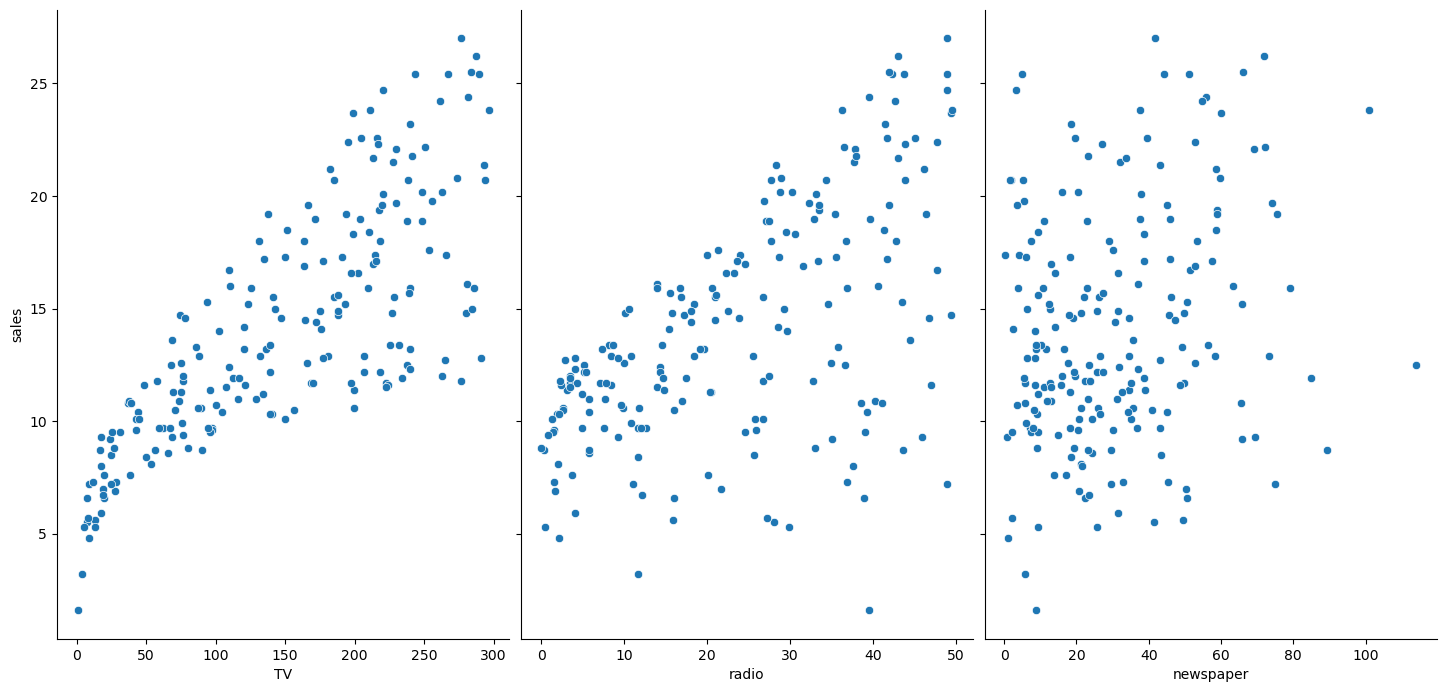

In [69]:
# özellikler arasındaki ilişki

sns.pairplot(df, x_vars=['TV','radio','newspaper'], y_vars='sales', height=7, aspect=0.7);

In [70]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

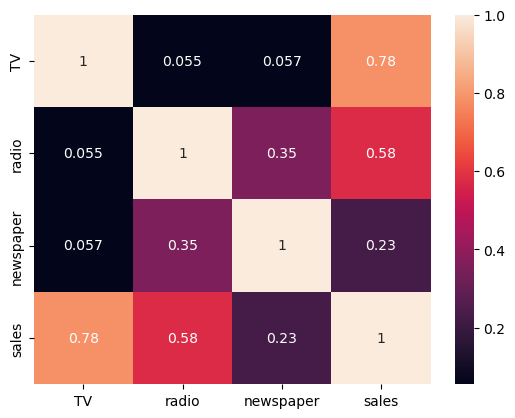

In [71]:
# plot the heatmap

sns.heatmap(df.corr(), annot=True)

In [72]:
x = df.drop("sales", axis=1)  # bağımlı değişken olan sales(y) atip, tum bağımlı değişkenleri x'e atadık.
y = df["sales"]               # bağımlı değişkenlerimiz

In [73]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state= 42)

In [74]:
#Çoklu Doğrusal Regresyon - Katsayıları Tahmin Etme 

lm = LinearRegression()
model = lm.fit(x_train,y_train)

In [75]:
model.intercept_

2.9790673381226256

In [76]:
# modelimizin tüm bağımsız değişkenlerinin katsayısı yani her bir bağımsız değişkeni bir birim arttırdığımızda 
#..satışlarda ne kadarlık bir artış sağlanır.
model.coef_   

array([0.04472952, 0.18919505, 0.00276111])

In [77]:
new_data = [[30], [10],[40]]         
new_data = pd.DataFrame(new_data).T  
model.predict(new_data) 

# tv, radio ve gazete reklamlarında [30], [10],[40] birimleri kadar yapılan artışların, ..
#...satışlara ne kadar etki ettiğini tahmin edecek

array([6.32334798])

In [78]:
# hata_payı = eğitim(train) setimizdeki gerçek y ile tahmin edilen bağımsız..
#...değişkenlerinin hata karelerinin ortalamalarınınn karekokunu aldık.
rmse = np.sqrt(mean_squared_error(y_train, model.predict(x_train)))
rmse

1.6447277656443373

In [79]:
# hata_payı = test setimizdeki gercek y ile tahmin edilen bağsız..
#...değişkenlerinin hata karelerinin ortalamalarının karekokunu aldık.
rmse = np.sqrt(mean_squared_error(y_test, model.predict(x_test)))
rmse

# NOT > Eğitim hatası ile test hatası arasındaki fark çok değilse modelleme iyidir yorumu yapılabilir. 

1.7815996615334502

In [80]:
model.score(x_train, y_train) 

0.8957008271017817

In [81]:
# Valide (dogrulanmış) edilmiş r2  değeri;
cross_val_score(model, x_train,  y_train, cv= 10, scoring="r2").mean()

0.7913548596916338

In [82]:
# egitim tahminlerimiz : 
y_head = model.predict(x_test)
y_head[0:5]

array([16.4080242 , 20.88988209, 21.55384318, 10.60850256, 22.11237326])

In [83]:
y_test_1 =np.array(range(0,len(y_test)))
y_test_1

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39])

Test r2 hatamiz =  0.899438024100912


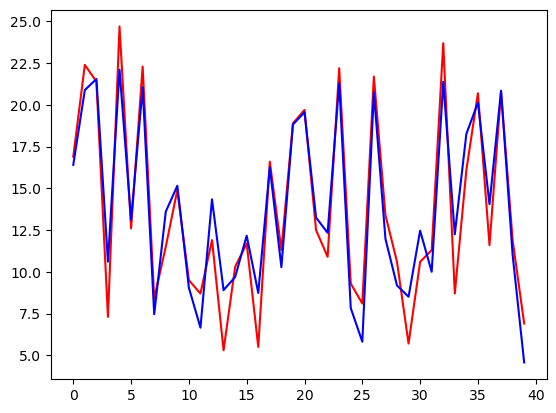

In [84]:
# r2 degerimiziz : 
r2_degeri = r2_score(y_test, y_head)
print("Test r2 hatamiz = ",r2_degeri) 

plt.plot(y_test_1,y_test,color="red")
plt.plot(y_test_1,y_head,color="blue")
plt.show()